<a href="https://colab.research.google.com/github/IsaacFigNewton/NoSKE/blob/main/NL2AMR2FRED_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install py_amr2fred rdflib

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 19.4 MB/s eta 0:00:00
  Created wheel for wikimapper: filename=wikimapper-0.2.0-py3-none-any.whl size=16138 sha256=b9fa8d540954943e25c16d390b23235cfcd4a2dfaec758d06b67e856dd74dc2f
  Stored in directory: /root/.cache/pip/wheels/c9/66/0b/bb2f6e4bd4581c1142ab67819076abafcb3877cba2b228c9b5
Successfully built wikimapper


In [2]:
from pathlib import Path
from py_amr2fred import Amr2fred, Glossary
from IPython.display import Image, display
from rdflib import Graph

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
amr = Amr2fred()

texts = [
    "Alice sold Bob a book in Paris on Friday. Later, she bought the book back from Bob.",
    "Quattro ragazzi preparano torte."  # Italian example
]

INFO:py_amr2fred.taf_post_processor:Returning initial graph, no entities to be linked to wikidata


Wrote /content/amr2fred_output.ttl
@prefix ns1: <https://w3id.org/framester/schema/> .
@prefix ns2: <https://w3id.org/framester/data/propbank-3.4.0/LocalRole/> .
@prefix ns3: <http://www.ontologydesignpatterns.org/ont/vn/abox/role/vnrole.owl#> .
@prefix ns4: <https://w3id.org/framester/wn/wn30/schema/> .
@prefix ns5: <http://www.ontologydesignpatterns.org/ont/fred/quantifiers.owl#> .
@prefix ns6: <https://w3id.org/framester/amrb/> .
@prefix ns7: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema: <https://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ns7:hasDataValue a owl:DatatypeProperty .

<http://www.ontologydesignpatterns.org/ont/fred/domain.owl#buy_1> a <https://w3id.org/framester/data/propbank-3.4.0/RoleSet/buy-01> ;
    ns3:Time <http://www.ontologydesignpatterns.org/ont/fred/domain.owl#after_1> ;
    ns2:buy-01.buyer <http://www.on

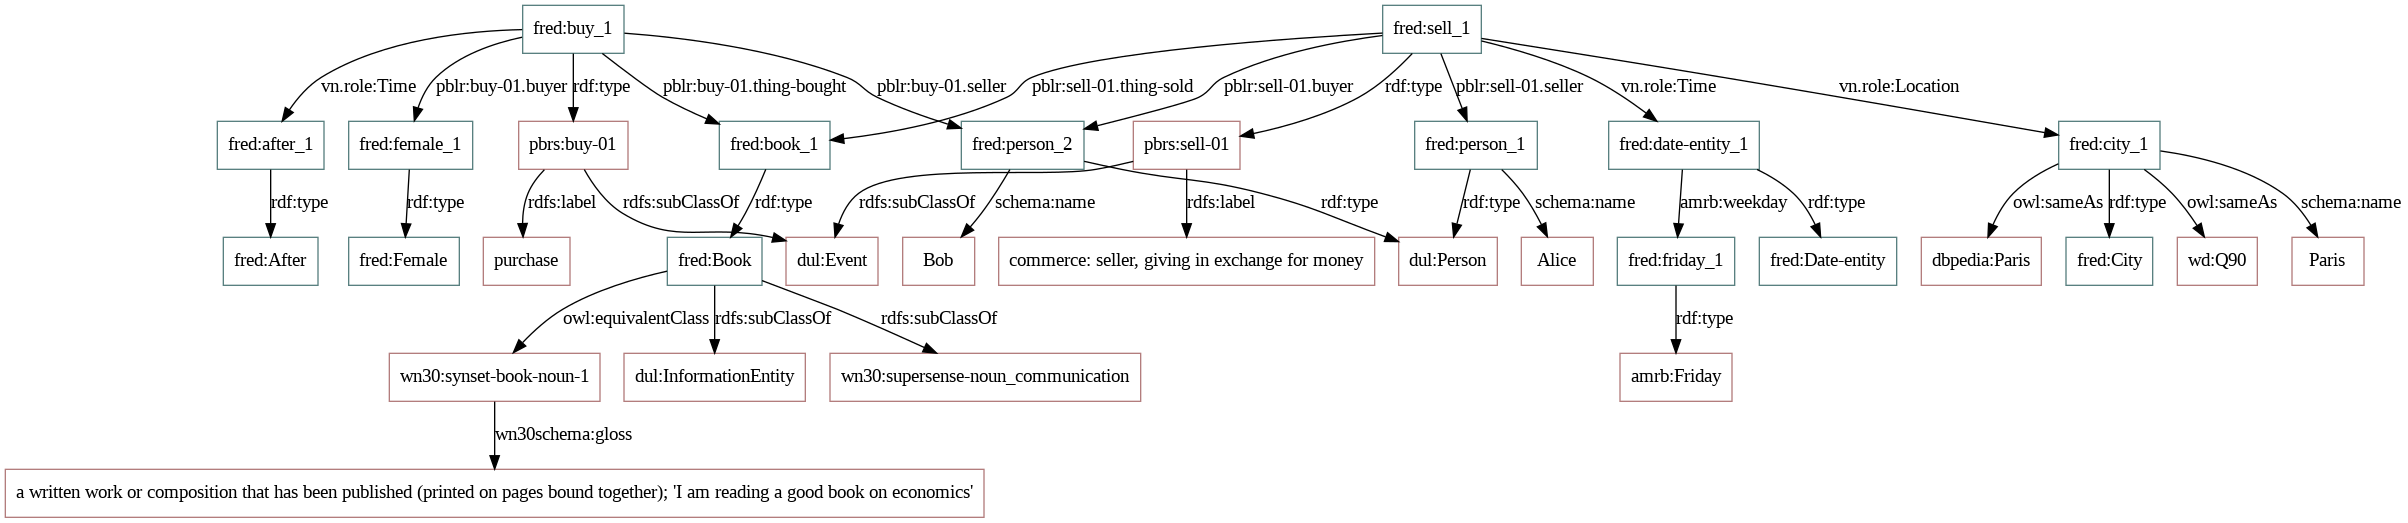

In [4]:
graphs = []
for t in texts:
    g = amr.translate(
        text=t,
        serialize=False,                       # get an rdflib.Graph
        mode=Glossary.RdflibMode.TURTLE,       # output format if serialize=True
        multilingual=("preparano" in t),       # demo: enable multilingual for non-EN
        post_processing=True                   # WSD + Wikidata enrichment
    )
    graphs.append(g)

# 2) Merge and persist
kg = Graph()
for g in graphs:
    kg += g

out = Path("amr2fred_output.ttl")
kg.serialize(destination=out, format="turtle")
print(f"Wrote {out.resolve()}")

# Display the TTL output
with open(out, "r") as f:
    print(f.read())


# 3) (Optional) Visual check for a single sentence
png = amr.translate(text=texts[0], graphic="png")
with open("check.png", "wb") as f:
    f.write(png.read())
png.close()

# Display the PNG image
display(Image("check.png"))